In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
# Define dataset directory
dataset_dir = 'dataset 1'

# Define the model save path
model_save_path = 'save path/banana_classifier_vgg16.h5'

In [8]:
# Image dimensions
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Training and validation data generators
datagen = ImageDataGenerator(
    rescale=1.0/255,            # Normalize pixel values to [0, 1]
    validation_split=0.2,       # Split 20% for validation
    rotation_range=20,         
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1696 images belonging to 4 classes.
Found 422 images belonging to 4 classes.


In [9]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
# Define paths for both formats
model_save_path_keras = 'save path/banana_classifier_vgg16.keras'
model_save_path_h5 = 'save path/banana_classifier_vgg16.h5'

# Callbacks
checkpoint = ModelCheckpoint(model_save_path_keras, monitor='val_accuracy', save_best_only=True, verbose=1)
#early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint]
)

# Save the model in .h5 format manually
model.save(model_save_path_h5)
print(f"Model saved in both .keras and .h5 formats.")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4456 - loss: 1.2504

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.58294, saving model to save path/banana_classifier_vgg16.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 610s 11s/step - accuracy: 0.4478 - loss: 1.2472 - val_accuracy: 0.5829 - val_loss: 1.0993
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7660 - loss: 0.7216
Epoch 2: val_accuracy improved from 0.58294 to 0.59953, saving model to save path/banana_classifier_vgg16.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 560s 11s/step - accuracy: 0.7666 - loss: 0.7204 - val_accuracy: 0.5995 - val_loss: 1.0054
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8164 - loss: 0.5452
Epoch 3: val_accuracy improved from 0.59953 to 0.60900, saving model to save path/banana_classifier_vgg16.keras
53/53 ━━━━━━━━━━━━━━━━━━━━ 519s 10s/step - accuracy: 0.8166 - loss: 0.5445 - val_accuracy: 0.6090 - val_loss: 0.9715
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.8601 - loss: 0.4320 
Epoch 4: val_accuracy improved from 0.60900 to 0.62559, saving m

Model saved in both .keras and .h5 formats.


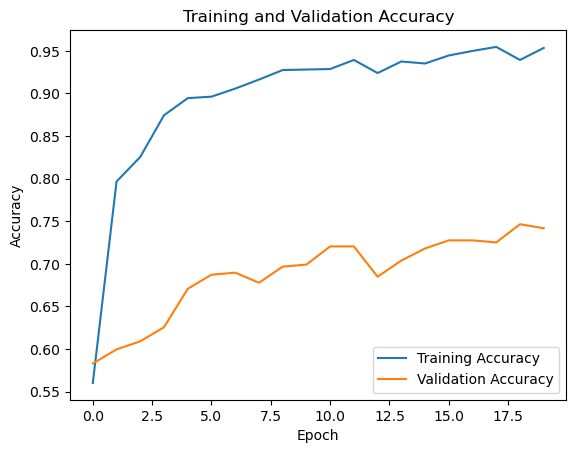

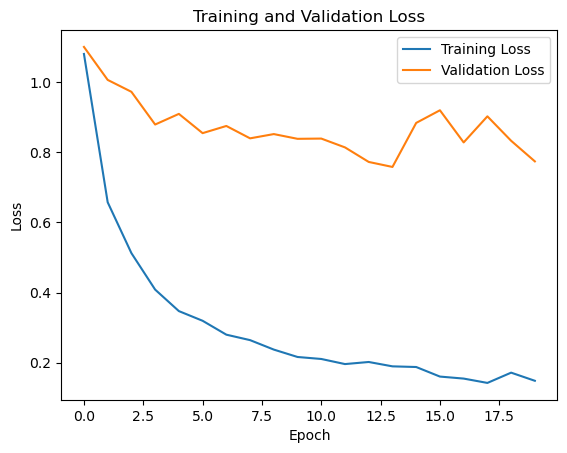

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 102s 7s/step


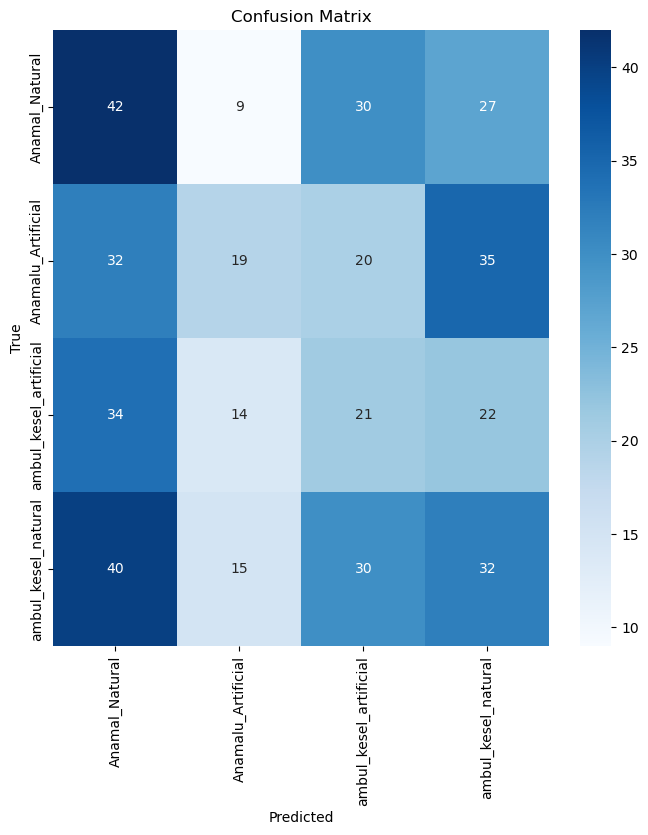

Classification Report:
                        precision    recall  f1-score   support

        Anamal_Natural       0.28      0.39      0.33       108
    Anamalu_Artificial       0.33      0.18      0.23       106
ambul_kesel_artificial       0.21      0.23      0.22        91
   ambul_kesel_natural       0.28      0.27      0.27       117

              accuracy                           0.27       422
             macro avg       0.28      0.27      0.26       422
          weighted avg       0.28      0.27      0.27       422



In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get true labels and predicted labels
val_generator.reset()
Y_true = val_generator.classes
Y_pred = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print('Classification Report:')
print(classification_report(Y_true, Y_pred_classes, target_names=val_generator.class_indices.keys()))


In [13]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 104s 7s/step - accuracy: 0.7236 - loss: 0.9122
Validation Accuracy: 73.46%
Validation Loss: 0.8062
